# 7.4. Estimating the correlation between two variables with a contingency table and a chi-squared test

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

Number of columns: 70


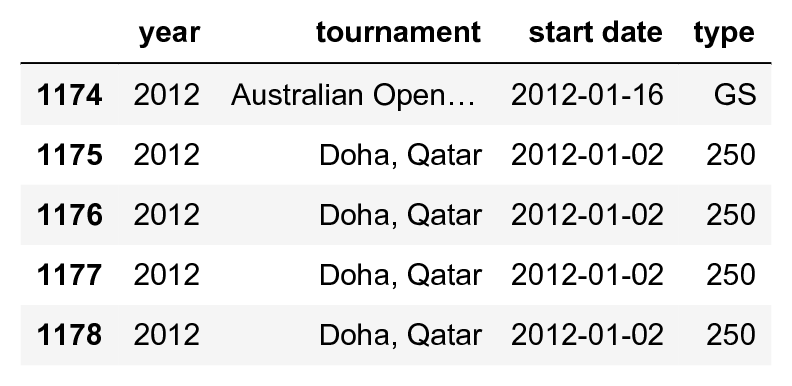

In [3]:
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

In [4]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

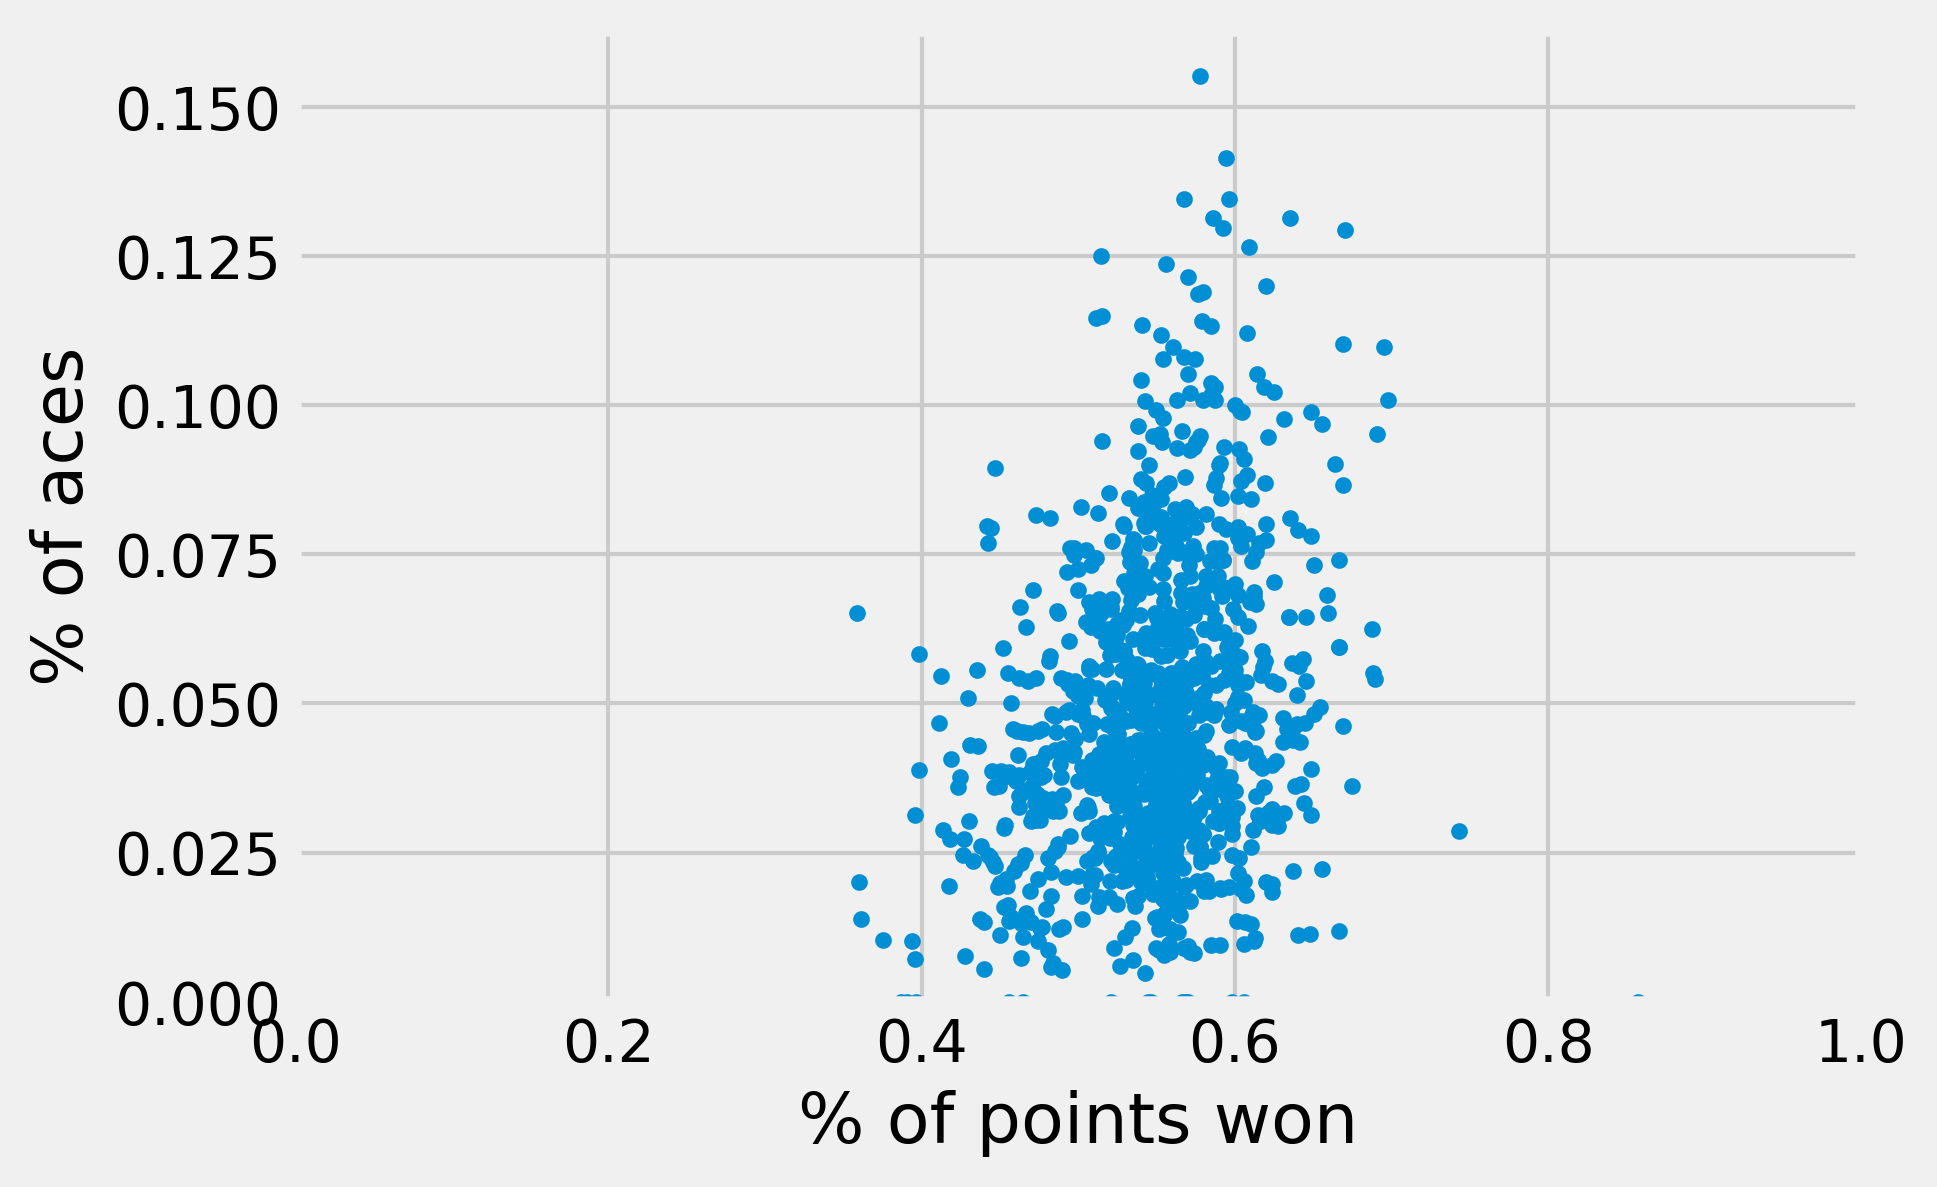

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

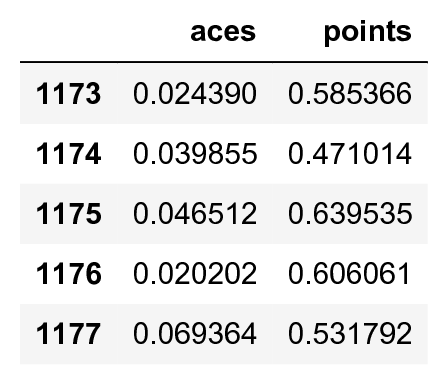

In [6]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()

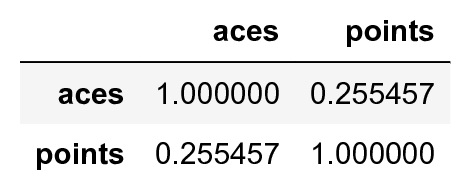

In [7]:
df_bis.corr()

In [8]:
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

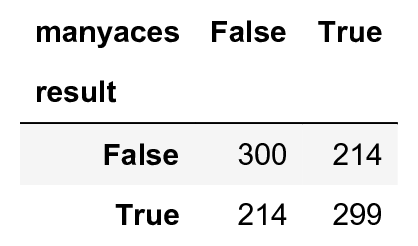

In [9]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

In [10]:
st.chi2_contingency(_)

(2.780e+01, 1.338e-07, 1,
    array([[ 257.250,  256.749],
           [ 256.749,  256.250]]))